## TP2

#### Alumno: Emmanuel Cardozo

Implementar la función create_gauss_filter(h, w, k_size, sigma) para crear filtros gaussianos para filtrado 
espectral. Debe retornar un filtro gaussiano de tamaño HxW en dominio espacial y su transformada de Fourier.

1. Graficar ambas representaciones para diferentes tamaños de kernel y sigma. Aplicar el filtro a una imagen para 
validar el funcionamiento en el dominio espectral.

2. Comparar el resultado de hacer un filtrado por convolución con el mismo kernel.

▪ Para la imagen suministrada “metal grid”. Implementar un algoritmo que:
1. Calcule los gradientes en la imagen (dirección y módulo)
2. Muestre imágenes de ángulo y módulo
3. Marque con colores las direcciones de gradientes más representativos.

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import os

#### Primera parte
Creamos una función para cargar imágenes y definimos la función create_gauss_filter.

In [5]:
def load_image(path, filename, grayscale=False):
    flags = {"flags": cv.IMREAD_GRAYSCALE} if grayscale else {}
    img = cv.imread(os.path.join(path, filename), **flags)
    if grayscale:
        return img
    return cv.cvtColor(img, cv.COLOR_BGR2RGB)

def create_gauss_filter(h, w, k_size, sigma):
    canvas = np.zeros((h, w))
    kernel = cv.getGaussianKernel(k_size, sigma)
    kernel = kernel @ kernel.T
    y_axis_start = h // 2 - kernel.shape[0] // 2
    x_axis_start = w // 2 - kernel.shape[1] // 2
    canvas[
        y_axis_start : y_axis_start + kernel.shape[0],
        x_axis_start : x_axis_start + kernel.shape[1],
    ] = kernel
    return canvas, np.fft.fft2(canvas)

Probamos la función create_gauss_filter generando un filtro con kernel de tamaño 5 y desviación estándar 3.
Posteriormente graficamos el filtro y su transformada.

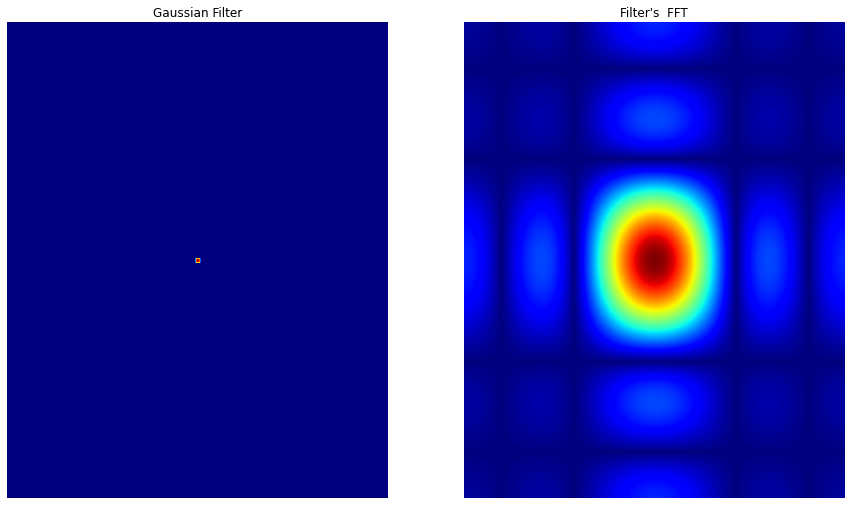

In [4]:
filter, filter_fourier_transform = create_gauss_filter(500, 400, k_size=5, sigma=3)

plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Gaussian Filter")
plt.imshow(filter, cmap="jet")
plt.subplot(1, 2, 2)
plt.axis("off")
plt.title("Filter's  FFT")
plt.imshow(np.abs(np.fft.fftshift(filter_fourier_transform)), cmap="jet")
plt.show()

Cargamos la imagen fchewbacca.jpg en escala de grises y le aplicamos filtros gausianos variando los tamaños de kernel y desvío estándar para ver el funcionamiento de la función create_gauss_filter en el dominio espectral. Los kernels aplicados son impares, como se observó en la práctica y básicamente la resolución del ejercicio consiste en aplicar la Transformada de Fourier del filtro a la Transformada de Fourier de la imagen y antitransformar su producto.

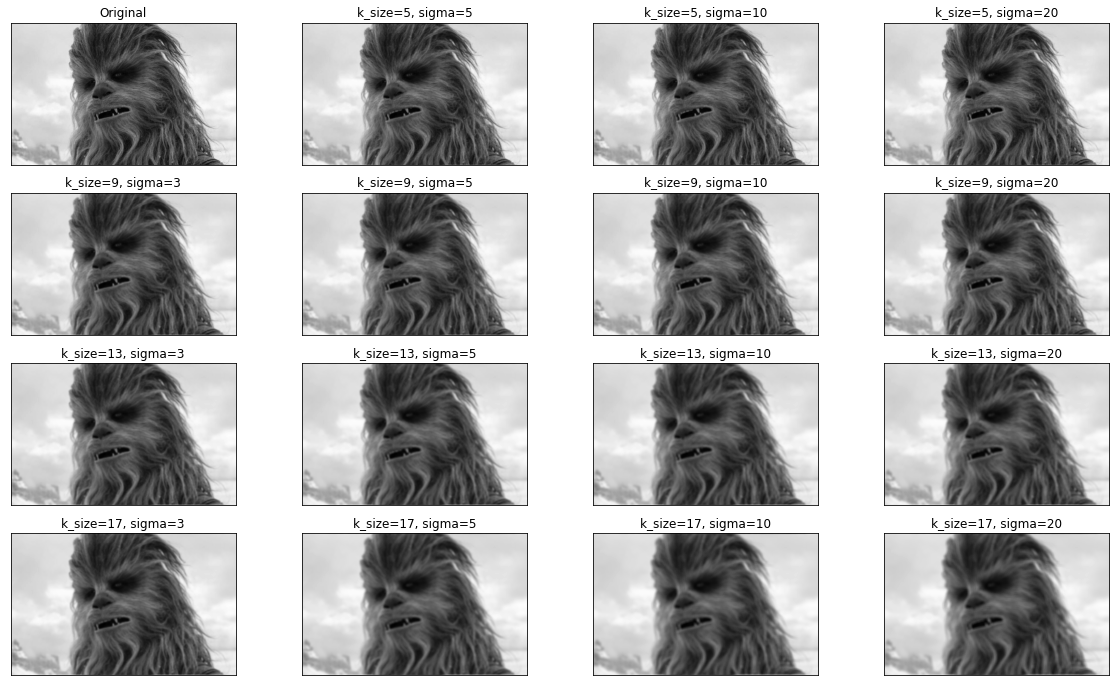

In [50]:
def image_filter(img, k_size, sigma):
    gauss_filter, FT_gauss_filter = create_gauss_filter(
        img.shape[0],
        img.shape[1],
        k_size=k_size,
        sigma=sigma,
    )
    img_fft = np.fft.fft2(img)
    filtered_image = img_fft * FT_gauss_filter
    return np.fft.ifftshift(np.real(np.fft.ifft2(filtered_image)))

def plot_filtered_images(img, filter_func, combinations, size, figsize):
    _, axes = plt.subplots(size[0], size[1], figsize=figsize)
    for i in range(size[0]):
        for j in range(size[1]):
            if i == 0 and j == 0:
                processed_img = img
                title = "Original"
            else:
                (k_size, sigma) = combinations[size[0] * i + j]
                processed_img = filter_func(img, k_size, sigma)
                title = f"k_size={k_size}, sigma={sigma}"
            axes[i][j].imshow(processed_img, cmap="gray", vmin=0, vmax=255)
            axes[i][j].title.set_text(title)
            axes[i][j].xaxis.set_visible(False)
            axes[i][j].yaxis.set_visible(False)


images_path = R"C:\Users\Emmanuel\Desktop\CEIA-VPC1-TP2/assets"

img = load_image(images_path, "chewbacca.jpg", grayscale=True)

combinations = [
    (None, None),
    (5, 5),
    (5, 10),
    (5, 20),
    (9, 3),
    (9, 5),
    (9, 10),
    (9, 20),
    (13, 3),
    (13, 5),
    (13, 10),
    (13, 20),
    (17, 3),
    (17, 5),
    (17, 10),
    (17, 20),
]

plot_filtered_images(img, image_filter, combinations, size=(4, 4), figsize=(20, 12))

Se evidencia que al aumentar el kernel y el desvío estándar, aumenta el blur en la imagen. Esto se hace notorio para la última imagen, en la que se utilizó un kernel de 17x17 y un desvío estándar de 20.

Compararemos el resultado de hacer el filtrado por convolución de la misma imagen, con las mismas variaciones de kernel y desvío estándar.

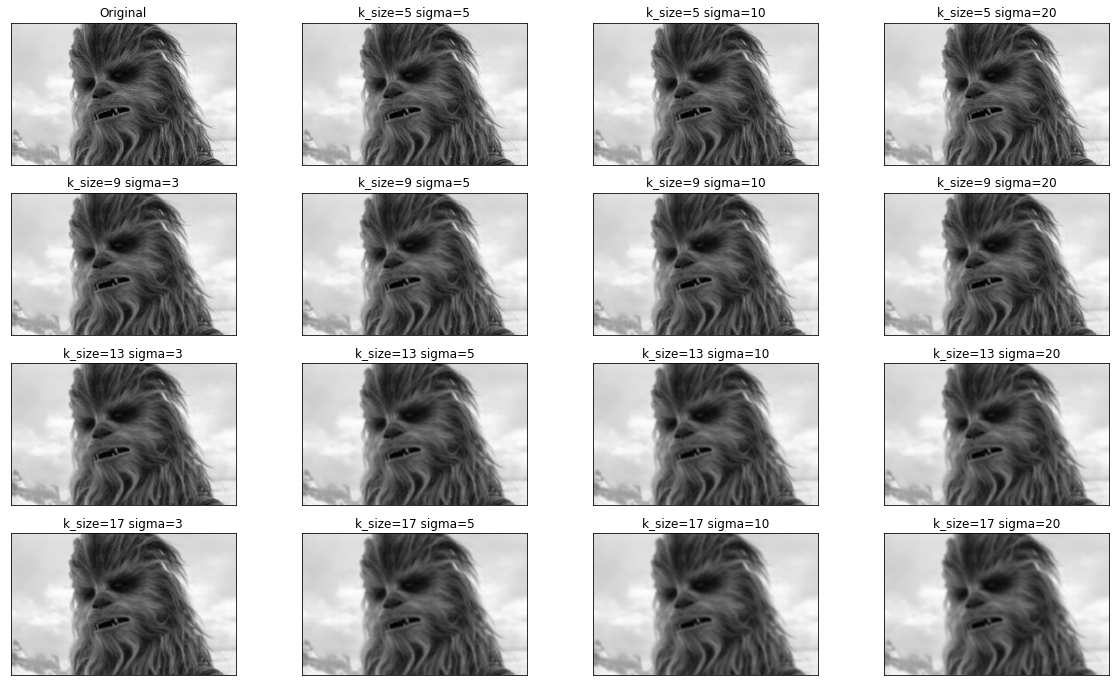

In [45]:
def convolution_filter (img, k_size, sigma):
    kernel = cv.getGaussianKernel(k_size, sigma)
    kernel = kernel @ kernel.T
    return cv.filter2D(img, -1, kernel)

plot_filtered_images (img, convolution_filter, combinations, size=(4, 4), figsize=(20, 12))

Las imágenes con el filtro de convolución se ven práctivamente iguales que al aplicar el filtro gaussiano con transformada de Fourier (con los mismos kernels y sigmas)  lo que tiene sentido, dado que la transformada de Fourier de la Convolución, es igual al producto de las transformadas (en  éste caso de la imagen y del filtro). 

#### Segunda Parte
▪ Para la imagen suministrada “metal grid”. Implementar un algoritmo que:
1. Calcule los gradientes en la imagen (dirección y módulo)
2. Muestre imágenes de ángulo y módulo
3. Marque con colores las direcciones de gradientes más representativos.

Cargamos la imagen y la vemos en escala de grises porque luego debemos ver colores de las direcciones de los gradientes más representativos de ángulo y módulo

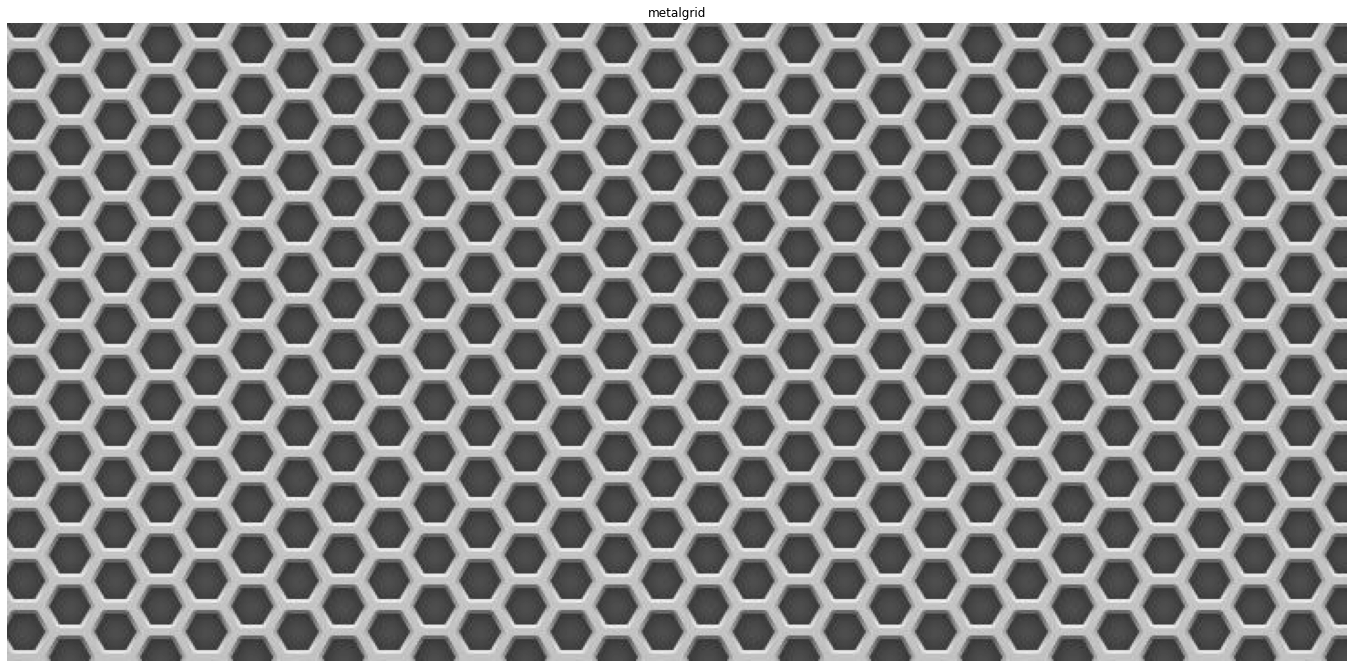

In [67]:
img = load_image(images_path, "metalgrid.jpg", grayscale=True)

plt.figure(figsize=(24, 12))
plt.imshow(img, cmap="gray", vmin=0, vmax=255)
plt.axis("off")
plt.title("metalgrid")
plt.show()

Para resolver la segunda parte, nos valemos de los filtros de sobel. El filtro de sobel, técnicamente es un operador diferencial discreto que calcula una aproximación al gradiente de la función de intensidad de una imagen. 
Primero se efectúa un blur gaussiano a la imagen y luego se calculan filtros de sobel en las direcciones de los ejes *x* e *y*. 

In [69]:
blur = cv.GaussianBlur(img, (5, 5), 0)

sobel_x_64 = cv.Sobel(blur, cv.CV_64F, 1, 0, ksize=3)
abs_x_64 = np.absolute(sobel_x_64)
sobel_x_uint8 = np.uint8(abs_x_64 / abs_x_64.max() * 255)

sobel_y_64 = cv.Sobel(blur, cv.CV_64F, 0, 1, ksize=3)
abs_y_64 = np.absolute(sobel_y_64)
sobel_y_uint8 = np.uint8(abs_y_64 / abs_y_64.max() * 255)

mod = np.hypot(sobel_x_uint8, sobel_y_uint8)
mod = np.uint8(mod / mod.max() * 255)
theta = np.arctan2(sobel_y_64, sobel_x_64)
angle = np.rad2deg(theta)

Graficamos ángulo y módulo de la imagen:

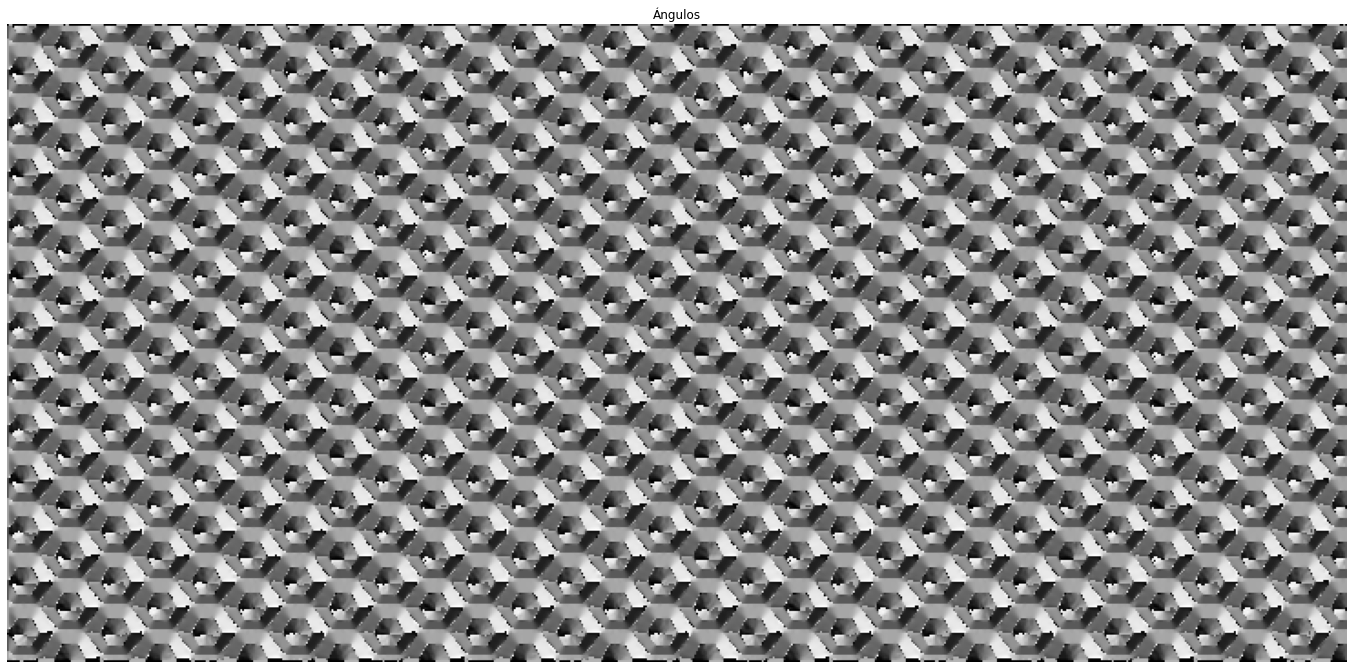

In [70]:
plt.figure(figsize=(24, 12))
plt.imshow(np.uint8(angle), cmap="gray", vmin=0, vmax=255)
plt.axis("off")
plt.title("Ángulos")
plt.show()

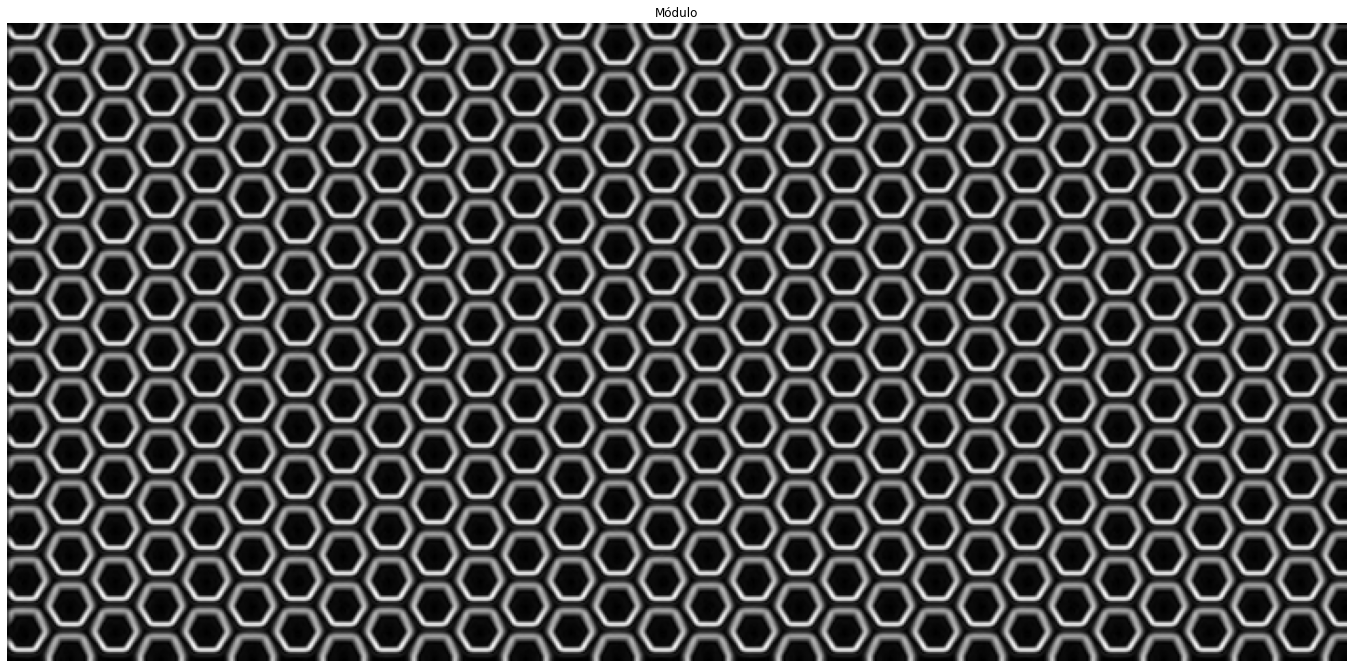

In [71]:
plt.figure(figsize=(24, 12))
plt.imshow(mod, cmap="gray", vmin=0, vmax=255)
plt.axis("off")
plt.title("Módulo")
plt.show()

Marcamos con colores las direcciones de gradientes más representativos de ángulo y módulo. Para ello hacemos sobre la imagen una convolución con un filtro de sobel y además un blurred, encontramos la orientación de los gradientes, según la orientación otorgamos un color ese gradiente y obtenemos los más importantes (es decir, los coloreamos), cuando el módulo en el pixel evaluado, es mayor a un determinado valor (se colocó 100 empíricamente).

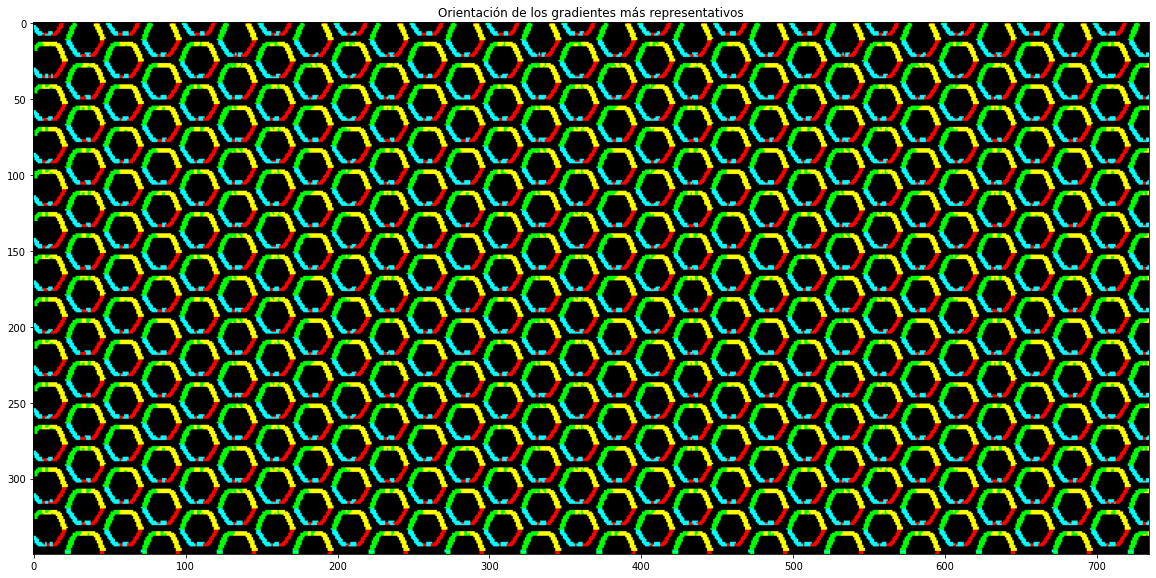

In [106]:
sobel_x = np.array([[ -1, 0, 1], 
                   [ -2, 0, 2], 
                   [ -1, 0, 1]])

sobel_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])

colored_image = load_image(images_path, "metalgrid.jpg")

filtered = cv.filter2D(colored_image, cv.CV_32F, sobel_x)
filtered_blurred_x = cv.filter2D(blur, cv.CV_32F, sobel_x)  
filtered_blurred_y = cv.filter2D(blur, cv.CV_32F, sobel_y) 

orientation = cv.phase(filtered_blurred_x, filtered_blurred_y, angleInDegrees=True)

image_map = np.zeros((orientation.shape[0], orientation.shape[1], 3), dtype=np.int16)

red = np.array([255, 0, 0])
cyan = np.array([0, 255, 255])
green = np.array([0, 255, 0])
yellow = np.array([255, 255, 0])

for i in range(0, image_map.shape[0]):
    for j in range(0, image_map.shape[1]):
        if orien[i][j]   < 90.0 and mod[i][j] > 120:
            image_map[i, j, :] = red
        elif orien[i][j] >= 90.0 and orien[i][j] < 180.0 and mod[i][j] > 100:
            image_map[i, j, :] = cyan
        elif orien[i][j] >= 180.0 and orien[i][j] < 270.0 and mod[i][j] > 100:
            image_map[i, j, :] = green
        elif orien[i][j] >= 270.0 and orien[i][j] < 360.0 and mod[i][j] > 100:
            image_map[i, j, :] = yellow

f, ax1 = plt.subplots(1, 1, figsize=(20,15))

ax1.set_title('Orientación de los gradientes más representativos')
ax1.imshow(image_map)
